# File and libraries

In [25]:
import pandas as pd
import numpy as np


filepath=r'data/df_merch_7_bal_input'
test_filepath= f"{filepath}_test.csv"
train_filepath= f"{filepath}_train.csv"

file_tag = "df_merch_final"

# DSLabs functions

In [26]:
%run "scripts/dslabs_functions.py"


# Data functions

In [27]:
%run "scripts/data_functions.py"


data_functions lodaded


# Load

In [28]:

# test_data=True
test_data=False

# use to evaluate strategies. otherwise False to just transform data 
evaluate=True
# evaluate=False

if test_data==True:

    data=pd.read_csv(f"{filepath}.csv")
    
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # sample
    data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)
    train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.01)).reset_index(drop=True)

    # data=data.sample(frac=0.05, replace=False)
    # test=test.sample(frac=0.05, replace=False)
    # train=train.sample(frac=0.05, replace=False)
    
    
else:
    data=pd.read_csv(f"{filepath}.csv")  
    test= pd.read_csv(test_filepath)
    train= pd.read_csv(train_filepath)

    # larger sample 10%
    # data = data.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # test = test.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)
    # train = train.groupby('day_of_year').apply(lambda x: sample_per_day(x, 0.1)).reset_index(drop=True)

 
target='returning_user'
vars: list[str] = data.columns.to_list()
labels: list = list(data[target].unique())


# ensure sorting by day_of_year for correct splitting 
# "When in the presence of temporal data, data partition shall use older data to train and newer to test, in order to not use future data to classify past data. In any other case, partition shall be random."
data.sort_values(by='day_of_year', inplace=True)
test.sort_values(by='day_of_year', inplace=True)
train.sort_values(by='day_of_year', inplace=True)



data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 364427 entries, 0 to 364426
Data columns (total 42 columns):
 #   Column                           Non-Null Count   Dtype  
---  ------                           --------------   -----  
 0   event_name                       364427 non-null  float64
 1   device_category                  364427 non-null  float64
 2   device_mobile_brand_name         364427 non-null  float64
 3   device_mobile_model_name         364427 non-null  float64
 4   device_operating_system          364427 non-null  float64
 5   device_operating_system_version  364427 non-null  float64
 6   device_language                  364427 non-null  float64
 7   device_web_info_browser          364427 non-null  float64
 8   device_web_info_browser_version  364427 non-null  float64
 9   geo_region                       364427 non-null  float64
 10  geo_city                         364427 non-null  float64
 11  traffic_source_medium            364427 non-null  float64
 12  traffic

# Distribution Check

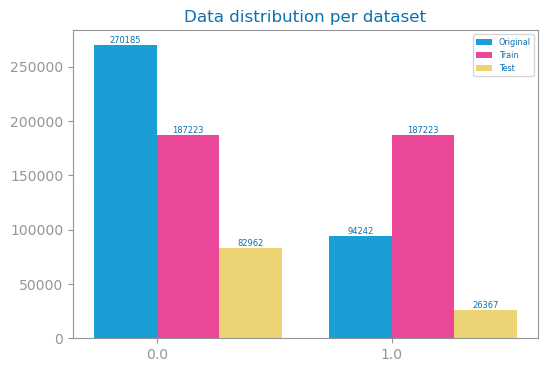

In [29]:
from pandas import concat
from matplotlib.pyplot import figure, show
from dslabs_functions import plot_multibar_chart


# Distribution check


# Create a dictionary to store original class counts
values: dict[str, list[int]] = {
    "Original": [
        len(data[data[target] == 0]),  # Assuming 0 is the negative class
        len(data[data[target] == 1]),  # Assuming 1 is the positive class
    ]
}

values["Train"] = [
    len(train[train[target] == 0]),
    len(train[train[target] == 1]),
]
values["Test"] = [
    len(test[test[target] == 0]),
    len(test[test[target] == 1]),
]

# Visualize the distribution
figure(figsize=(6, 4))
plot_multibar_chart(labels, values, title="Data distribution per dataset")
show()

# Model Evaluation

In [30]:
if evaluate==True:

    trnX, tstX, trnY, tstY, labels, vars = read_train_test_from_files(train, test, target)
    print(f'Train#={len(trnX)} Test#={len(tstX)}')
    print(f'Labels={labels}')

Train#=374446 Test#=109329
Labels=[0.0, 1.0]


## recall evaluation

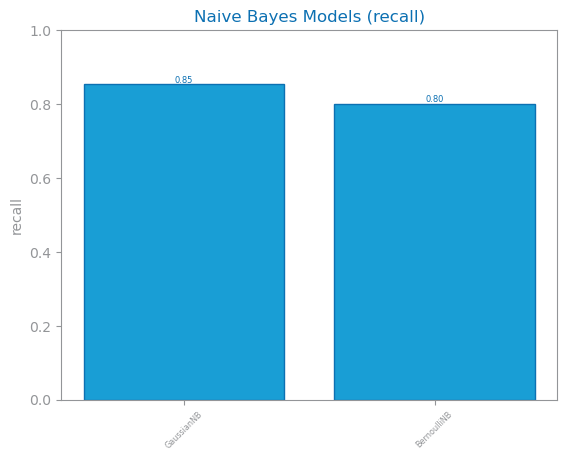

In [31]:
if evaluate==True:
    
    best_model_recall, recall_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='recall')
    savefig(f'images/{file_tag}_dt_recall_study.png')
    show()

## evaluate precision

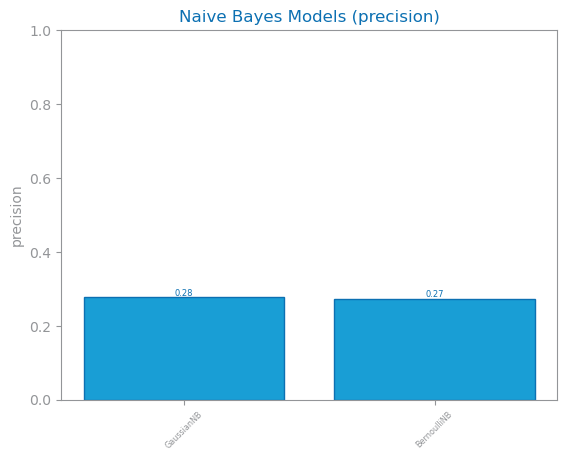

In [32]:
if evaluate==True:

    best_model_prec, prec_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='precision')
    savefig(f'images/{file_tag}_dt_precision_study.png')
    show()

## evaluate accuracy

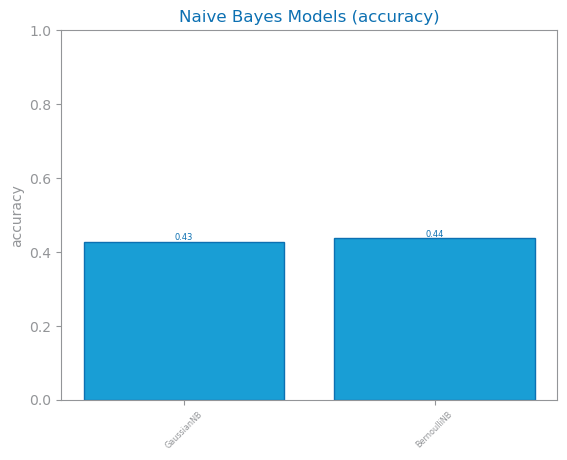

In [33]:
if evaluate==True:

    best_model_fl, fl_params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric='accuracy')
    savefig(f'images/{file_tag}_dt_accuracy_study.png')
    show()

## Evaluate for best model - NB

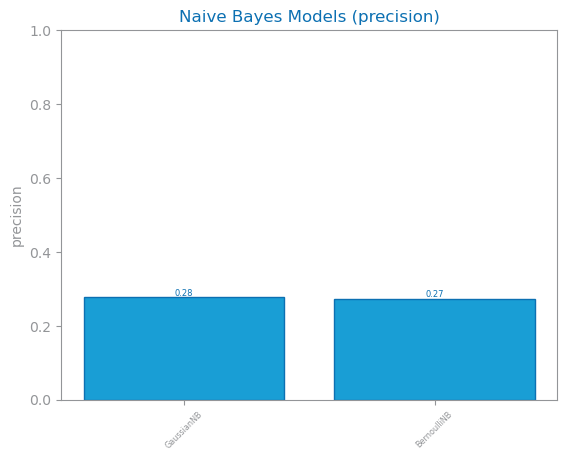

In [34]:
if evaluate==True:



    figure()

    eval_metric = 'precision'

    best_model, params = naive_Bayes_study(trnX, trnY, tstX, tstY, metric=eval_metric)
    savefig(f'images/{file_tag}_dt_{eval_metric}_study.png')
    show()

# Best Model Performance

<Figure size 640x480 with 0 Axes>

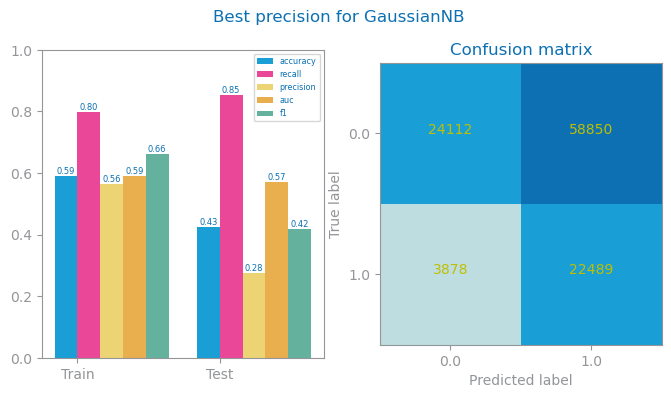

In [35]:
if evaluate == True:
    prd_trn: array = best_model.predict(trnX)
    prd_tst: array = best_model.predict(tstX)
    figure()
    plot_evaluation_results(params, trnY, prd_trn, tstY, prd_tst, labels)
    savefig(f'images/{file_tag}_dt_{params["name"]}_best_{params["metric"]}_eval.png')
    show()

# Overfitting

# Analysis

